## Amazon’s Customer Building Blocks –Reviews & Ratings

###### Amazon is the most recognized name in the modern world, no matter which State you go to in the US or which country you visit. This enterprise has achieved great results in the past few decades.  The product and supply chain established at Amazon is one of a kind that has been studied by many experts and has set a standard for others in the retail ecommerce arena.
###### When products are sold on Amazon's website one of the most sought after characteristics are the reviews and the Star Ratings that a product gets which either makes or breaks the successful sales precentages of a product.  I will therefore be analyzing these a little closer and doing some careful predictive analysis to determine which characteristics are related and symbolize success.

###### The data used is historic and from Amazon available on the website http://jmcauley.ucsd.edu/data/amazon/

###### QUESTIONS ASKED 

<div class="span5 alert alert-info">

   <p> 1.	Does the wordcount in the review text matter? Do more words mean higher overall Star Ratings?</p>

   <p>2.	Do all Overall Star Ratings (1-5) have the same behavior across Product Categories i.e. Do Amazon Customers give more 1 stars to Baby products or more 5 stars to Android Apps?</p>

   <p>3.	Can we predict Overall Star Ratings given the word count of the review text?</p>
</div>

###### IMPORTING RELEVANT PACKAGES & MODULES:A common practice that was adopted was to use aliases for the imported packages and modules.

In [1]:
import pandas as pd
import gzip

import matplotlib.pyplot as plt

import datetime
import calendar

import numpy as np

# data visualization
import seaborn as sns

%matplotlib inline
from matplotlib import style
plt.style.use('fivethirtyeight')

from string import punctuation

from __future__ import division

from nltk.tokenize import word_tokenize 
from nltk.tokenize import sent_tokenize
from nltk.tokenize import regexp_tokenize

import re

from IPython.core.debugger import Pdb


# Start of Data Munging Section

###### Collecting the raw data from the website http://jmcauley.ucsd.edu/data/amazon/ .  The Reviews dataset had a total of 24 files that were ‘gzipped’ and in the JSON format. These files were segregated by ‘Product Category’.

###### Data Munging: Function to GUnzip a File & Function to return a Dataframe from a JSON - Gzip file

In [2]:
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

###### Data Munging: Reading the Reviews into DataFrames

In [3]:
df_IV = getDF('reviews_Amazon_Instant_Video_5.json.gz')
df_AA = getDF('reviews_Apps_for_Android_5.json.gz')
df_AU = getDF('reviews_Automotive_5.json.gz')
df_BA = getDF('reviews_Baby_5.json.gz')
df_BE = getDF('reviews_Beauty_5.json.gz')
df_BO = getDF('reviews_Books_5.json.gz')
df_CV = getDF('reviews_CDs_and_Vinyl_5.json.gz')
df_CP = getDF('reviews_Cell_Phones_and_Accessories_5.json.gz')
df_CJ = getDF('reviews_Clothing_Shoes_and_Jewelry_5.json.gz')
df_DM = getDF('reviews_Digital_Music_5.json.gz')
df_EL = getDF('reviews_Electronics_5.json.gz')
df_GG = getDF('reviews_Grocery_and_Gourmet_Food_5.json.gz')
df_HP = getDF('reviews_Health_and_Personal_Care_5.json.gz')
df_HK = getDF('reviews_Home_and_Kitchen_5.json.gz')
df_KS = getDF('reviews_Kindle_Store_5.json.gz')
df_MT = getDF('reviews_Movies_and_TV_5.json.gz')
df_MI = getDF('reviews_Musical_Instruments_5.json.gz')
df_OP = getDF('reviews_Office_Products_5.json.gz')
df_LG = getDF('reviews_Patio_Lawn_and_Garden_5.json.gz')
df_PS = getDF('reviews_Pet_Supplies_5.json.gz')
df_SO = getDF('reviews_Sports_and_Outdoors_5.json.gz')
df_TH = getDF('reviews_Tools_and_Home_Improvement_5.json.gz')
df_TG = getDF('reviews_Toys_and_Games_5.json.gz')
df_VG = getDF('reviews_Video_Games_5.json.gz')

###### Data Munging: Adding the Product Type Column to each DataFrame so as to identify the product category that the Reviews and Ratings belong to.

In [4]:
df_IV['ProductType'] = 'Instant Video'
df_AA['ProductType'] = 'Android Apps'
df_AU['ProductType'] = 'Automotive'
df_BA['ProductType'] = 'Baby'
df_BE['ProductType'] = 'Beauty'
df_BO['ProductType'] = 'Books'
df_CV['ProductType'] = 'CDs_and_Vinyl'
df_CP['ProductType'] = 'Cell_Phones_and_Accessories'
df_CJ['ProductType'] = 'Clothing_Shoes_and_Jewelry'
df_DM['ProductType'] = 'Digital_Music'
df_EL['ProductType'] = 'Electronics'
df_GG['ProductType'] = 'Grocery_and_Gourmet_Food'
df_HP['ProductType'] = 'Health_and_Personal_Care'
df_HK['ProductType'] = 'Home_and_Kitchen'
df_KS['ProductType'] = 'Kindle_Store'
df_MT['ProductType'] = 'Movies_and_TV'
df_MI['ProductType'] = 'Musical_Instruments'
df_OP['ProductType'] = 'Office_Products'
df_LG['ProductType'] = 'Patio_Lawn_and_Garden'
df_PS['ProductType'] = 'Pet_Supplies'
df_SO['ProductType'] = 'Sports_and_Outdoors'
df_TH['ProductType'] = 'Tools_and_Home_Improvement'
df_TG['ProductType'] = 'Toys_and_Games'
df_VG['ProductType'] = 'Video_Games'

###### Data Munging: Adding individual DFs to AmazonReviewsDataFrame List/Array

In [5]:
df_AzReviews =[]
df_AzReviews.append(df_IV)
df_AzReviews.append(df_AA)
df_AzReviews.append(df_AU) 
df_AzReviews.append(df_BA) 
df_AzReviews.append(df_BE) 
df_AzReviews.append(df_BO) 
df_AzReviews.append(df_CV) 
df_AzReviews.append(df_CP) 
df_AzReviews.append(df_CJ) 
df_AzReviews.append(df_DM) 
df_AzReviews.append(df_EL) 
df_AzReviews.append(df_GG)
df_AzReviews.append(df_HP) 
df_AzReviews.append(df_HK) 
df_AzReviews.append(df_KS) 
df_AzReviews.append(df_MT)
df_AzReviews.append(df_MI) 
df_AzReviews.append(df_OP)
df_AzReviews.append(df_LG) 
df_AzReviews.append(df_PS) 
df_AzReviews.append(df_SO)
df_AzReviews.append(df_TH)
df_AzReviews.append(df_TG)
df_AzReviews.append(df_VG)

# print(df_AzReviews[0].info())  
# print(df_AzReviews[23].info())  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37126 entries, 0 to 37125
Data columns (total 10 columns):
overall           37126 non-null float64
asin              37126 non-null object
reviewerID        37126 non-null object
summary           37126 non-null object
reviewerName      36797 non-null object
unixReviewTime    37126 non-null int64
reviewTime        37126 non-null object
reviewText        37126 non-null object
helpful           37126 non-null object
ProductType       37126 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 3.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 231780 entries, 0 to 231779
Data columns (total 10 columns):
overall           231780 non-null float64
asin              231780 non-null object
reviewerID        231780 non-null object
summary           231780 non-null object
reviewerName      228967 non-null object
unixReviewTime    231780 non-null int64
reviewTime        231780 non-null object
reviewText        231780 n

###### Data Munging: Use Value_counts() to understand how many columns are of type object

In [6]:
df_AzReviews[23].dtypes.value_counts()

object     8
int64      1
float64    1
dtype: int64

###### Data Munging: Printing Reviews Dataframe

In [7]:
print(df_AzReviews[23].head())

   overall        asin      reviewerID  \
0      1.0  0700099867  A2HD75EMZR8QLN   
1      4.0  0700099867  A3UR8NLLY1ZHCX   
2      1.0  0700099867  A1INA0F5CWW3J4   
3      3.0  0700099867  A1DLMTOTHQ4AST   
4      4.0  0700099867  A361M14PU2GUEG   

                                           summary  \
0         Pay to unlock content? I don't think so.   
1                                  Good rally game   
2                                        Wrong key   
3  awesome game, if it did not crash frequently !!   
4                                           DIRT 3   

                         reviewerName  unixReviewTime   reviewTime  \
0                                 123      1341792000   07 9, 2012   
1  Alejandro Henao "Electronic Junky"      1372550400  06 30, 2013   
2          Amazon Shopper "Mr.Repsol"      1403913600  06 28, 2014   
3                            ampgreen      1315958400  09 14, 2011   
4        Angry Ryan "Ryan A. Forrest"      1308009600  06 14, 2011   

 

###### Data Munging: Dataframe df_AzReviews[23] Before dropna

In [8]:
df_AzReviews[23].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231780 entries, 0 to 231779
Data columns (total 10 columns):
overall           231780 non-null float64
asin              231780 non-null object
reviewerID        231780 non-null object
summary           231780 non-null object
reviewerName      228967 non-null object
unixReviewTime    231780 non-null int64
reviewTime        231780 non-null object
reviewText        231780 non-null object
helpful           231780 non-null object
ProductType       231780 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 19.5+ MB


###### Data Munging: Dataframe df_AzReviews[23] After dropna 

In [9]:
df_AzReviews[23].dropna(how="any",inplace = True)
df_AzReviews[23].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228967 entries, 0 to 231779
Data columns (total 10 columns):
overall           228967 non-null float64
asin              228967 non-null object
reviewerID        228967 non-null object
summary           228967 non-null object
reviewerName      228967 non-null object
unixReviewTime    228967 non-null int64
reviewTime        228967 non-null object
reviewText        228967 non-null object
helpful           228967 non-null object
ProductType       228967 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 19.2+ MB


###### Data Munging: Dataframe df_AzReviews -  running the dropna method on the list of DFs so as to clean the data with missing information.

In [10]:
for i in range(24):
    df_AzReviews[i].dropna(how="any",inplace = True)

###### Data Munging: Printing Reviews Dataframe Head to check data integrity

In [11]:
print(df_AzReviews[0].head())

   overall        asin      reviewerID                         summary  \
0      2.0  B000H00VBQ  A11N155CW1UV02      A little bit boring for me   
1      5.0  B000H00VBQ  A3BC8O2KCL29V2           Excellent Grown Up TV   
2      1.0  B000H00VBQ   A60D5HQFOTSOM           Way too boring for me   
3      4.0  B000H00VBQ  A1RJPIGRSNX4PW     Robson Green is mesmerizing   
4      5.0  B000H00VBQ  A16XRPF40679KG  Robson green and great writing   

                     reviewerName  unixReviewTime   reviewTime  \
0                        AdrianaM      1399075200   05 3, 2014   
1                         Carol T      1346630400   09 3, 2012   
2  Daniel Cooper "dancoopermedia"      1381881600  10 16, 2013   
3                  J. Kaplan "JJ"      1383091200  10 30, 2013   
4                   Michael Dobey      1234310400  02 11, 2009   

                                          reviewText helpful    ProductType  
0  I had big expectations because I love English ...  [0, 0]  Instant Video  
1 

###### Data Munging: Printing Reviews Dataframe Tail to check data integrity

In [12]:
print(df_AzReviews[0].tail())

       overall        asin      reviewerID  \
37121      5.0  B00LPWPMCS  A1ELO9LMSE1CQ7   
37122      5.0  B00LPWPMCS   AGOEKVIJV9UX6   
37123      3.0  B00LPWPMCS  A3I291BE0RNZCU   
37124      4.0  B00LPWPMCS  A1MNITZRYU71IO   
37125      3.0  B00LPWPMCS  A1XMHK9HN5MW2H   

                                                 summary  \
37121                                      Great Series!   
37122  Forget the Vampire Diaries -- This is a REAL V...   
37123  It's only the first episode so I'm not real su...   
37124  and that is good. The accents are a bit much h...   
37125                  I may have paid towatch the pilot   

                  reviewerName  unixReviewTime   reviewTime  \
37121                    Mpr90      1405728000  07 19, 2014   
37122             Mr. Markster      1405296000  07 14, 2014   
37123      Rating My Best Pick      1405296000  07 14, 2014   
37124  Sherry "trying in ohio"      1405296000  07 14, 2014   
37125     Victoria J. Dennison      1405468800 

# End of Data Munging Section

# Start of Feature Engineering

###### Feature Engineering: Setting the index for the dataFrame List i.e. Reviews  as 'reviewerID'

In [13]:
for i in range(24):
    df_AzReviews[i].set_index(df_AzReviews[i]['reviewerID'],inplace=True)

###### Feature Engineering:Taking a sample set of fraction=0.05 i.e. 5% of each Product category and using random_state=99 for reproducing same results each time.  Appending each subset into one dataframe of Sample_AzReviews gives a total count of 902037 records.

In [14]:
Sample_AzReviews = pd.DataFrame()
Sample_AzReviews = Sample_AzReviews.append(df_AzReviews[0].sample(frac=0.05, random_state=99))
Sample_AzReviews = Sample_AzReviews.append(df_AzReviews[1].sample(frac=0.05, random_state=99))
Sample_AzReviews = Sample_AzReviews.append(df_AzReviews[2].sample(frac=0.05, random_state=99))
Sample_AzReviews = Sample_AzReviews.append(df_AzReviews[3].sample(frac=0.05, random_state=99))
Sample_AzReviews = Sample_AzReviews.append(df_AzReviews[4].sample(frac=0.05, random_state=99))
Sample_AzReviews = Sample_AzReviews.append(df_AzReviews[5].sample(frac=0.05, random_state=99))
Sample_AzReviews = Sample_AzReviews.append(df_AzReviews[6].sample(frac=0.05, random_state=99))
Sample_AzReviews = Sample_AzReviews.append(df_AzReviews[7].sample(frac=0.05, random_state=99))
Sample_AzReviews = Sample_AzReviews.append(df_AzReviews[8].sample(frac=0.05, random_state=99))
Sample_AzReviews = Sample_AzReviews.append(df_AzReviews[9].sample(frac=0.05, random_state=99))
Sample_AzReviews = Sample_AzReviews.append(df_AzReviews[10].sample(frac=0.05, random_state=99))
Sample_AzReviews = Sample_AzReviews.append(df_AzReviews[11].sample(frac=0.05, random_state=99))
Sample_AzReviews = Sample_AzReviews.append(df_AzReviews[12].sample(frac=0.05, random_state=99))
Sample_AzReviews = Sample_AzReviews.append(df_AzReviews[13].sample(frac=0.05, random_state=99))
Sample_AzReviews = Sample_AzReviews.append(df_AzReviews[14].sample(frac=0.05, random_state=99))
Sample_AzReviews = Sample_AzReviews.append(df_AzReviews[15].sample(frac=0.05, random_state=99))
Sample_AzReviews = Sample_AzReviews.append(df_AzReviews[16].sample(frac=0.05, random_state=99))
Sample_AzReviews = Sample_AzReviews.append(df_AzReviews[17].sample(frac=0.05, random_state=99))
Sample_AzReviews = Sample_AzReviews.append(df_AzReviews[18].sample(frac=0.05, random_state=99))
Sample_AzReviews = Sample_AzReviews.append(df_AzReviews[19].sample(frac=0.05, random_state=99))
Sample_AzReviews = Sample_AzReviews.append(df_AzReviews[20].sample(frac=0.05, random_state=99))
Sample_AzReviews = Sample_AzReviews.append(df_AzReviews[21].sample(frac=0.05, random_state=99))
Sample_AzReviews = Sample_AzReviews.append(df_AzReviews[22].sample(frac=0.05, random_state=99))
Sample_AzReviews = Sample_AzReviews.append(df_AzReviews[23].sample(frac=0.05, random_state=99))

Sample_AzReviews.count()

overall           902037
asin              902037
reviewerID        902037
summary           902037
reviewerName      902037
unixReviewTime    902037
reviewTime        902037
reviewText        902037
helpful           902037
ProductType       902037
dtype: int64

###### Feature Engineering: Function to Calculate Character Count in the ReviewText &  Function to Calculate Word Count in the ReviewText

In [15]:
def calculate_charcount(row):
    return len(row['reviewText'])

def calculate_wordcount(row):
    return len(row['reviewText'].split())

###### Feature Engineering: Adding reviewertext features such as character_count and word_count to the Reviews dataframe list

In [16]:
subset = (Sample_AzReviews['reviewText'].notnull())
suspect = pd.DataFrame()
suspect = Sample_AzReviews[subset]

Sample_AzReviews['charcount_reviewtext'] = suspect.apply(calculate_charcount,axis=1)

subset = (Sample_AzReviews['reviewText'].notnull())
suspect = pd.DataFrame()
suspect = Sample_AzReviews[subset]

Sample_AzReviews['wordcount_reviewtext'] = suspect.apply(calculate_wordcount,axis=1) 

###### Feature Engineering:Adding helpful column features such as helpful_numerator, helpful_denominator and helpful_percentage to the Reviews dataframe list

In [17]:
Sample_AzReviews['helpful_numerator'] = [helpful_Numbers[0] for helpful_Numbers in Sample_AzReviews['helpful']]
Sample_AzReviews['helpful_denominator'] = [helpful_Numbers[1] for helpful_Numbers in Sample_AzReviews['helpful']]
Sample_AzReviews['helpfulpercentage'] = [(np.divide(helpful_Numbers[0],helpful_Numbers[1])* 100) for helpful_Numbers in Sample_AzReviews['helpful']]

###### Feature Engineering:Adding time series features such as reviewYear, reviewMonth, reviewDate, reviewDayofWeek and ReviewWeekofYear to the Reviews and Ratings DataFrame lists. datetime.weekday()--Return the day of the week as an integer, where Monday is 0 and Sunday is 6

In [18]:
Sample_AzReviews['ReviewYear'] = [datetime.datetime.utcfromtimestamp(reviewtime).year for reviewtime in Sample_AzReviews['unixReviewTime']]
Sample_AzReviews['ReviewMonth'] = [datetime.datetime.utcfromtimestamp(reviewtime).month for reviewtime in Sample_AzReviews['unixReviewTime']]
Sample_AzReviews['ReviewDate'] = [datetime.datetime.utcfromtimestamp(reviewtime).day for reviewtime in Sample_AzReviews['unixReviewTime']]

Sample_AzReviews['ReviewDayofWeek'] = [datetime.datetime.utcfromtimestamp(reviewtime).weekday() for reviewtime in Sample_AzReviews['unixReviewTime']]
Sample_AzReviews['ReviewWeekofYear'] = [datetime.datetime.strftime(datetime.datetime.utcfromtimestamp(reviewtime),'%W') for reviewtime in Sample_AzReviews['unixReviewTime']]

###### Feature Engineering: Creating dummy variables from the Product Type, thereby providing binary numbers to the 24 categories of products i.e 24 added columns with either 0 or 1 values.

In [20]:
Sample_AzReviewsProductTypedummies = pd.get_dummies(Sample_AzReviews['ProductType'],prefix = 'ProductType').astype(int)
Sample_AzReviewsProductTypedummies.tail()

,ProductType_Android Apps,ProductType_Automotive,ProductType_Baby,ProductType_Beauty,ProductType_Books,ProductType_CDs_and_Vinyl,ProductType_Cell_Phones_and_Accessories,ProductType_Clothing_Shoes_and_Jewelry,ProductType_Digital_Music,ProductType_Electronics,...,ProductType_Kindle_Store,ProductType_Movies_and_TV,ProductType_Musical_Instruments,ProductType_Office_Products,ProductType_Patio_Lawn_and_Garden,ProductType_Pet_Supplies,ProductType_Sports_and_Outdoors,ProductType_Tools_and_Home_Improvement,ProductType_Toys_and_Games,ProductType_Video_Games
reviewerID,,,,,,,,,,,,,,,,,,,,,
A12Q18WBVH8F4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
ABWHLZFEM5SZY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
AJIDIVBILJKO0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
A29BQ6B90Y1R5F,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
A1KLTDLYHUW89O,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


###### Feature Engineering: Entire review sample dataset with added Product Type dummied features.

In [21]:
Sample_AzReviewscopy = Sample_AzReviews
Sample_AzReviewswithdummies = pd.concat([Sample_AzReviewscopy, Sample_AzReviewsProductTypedummies], axis=1)
Sample_AzReviewswithdummies.tail()

,overall,asin,reviewerID,summary,reviewerName,unixReviewTime,reviewTime,reviewText,helpful,ProductType,...,ProductType_Kindle_Store,ProductType_Movies_and_TV,ProductType_Musical_Instruments,ProductType_Office_Products,ProductType_Patio_Lawn_and_Garden,ProductType_Pet_Supplies,ProductType_Sports_and_Outdoors,ProductType_Tools_and_Home_Improvement,ProductType_Toys_and_Games,ProductType_Video_Games
reviewerID,,,,,,,,,,,,,,,,,,,,,
A12Q18WBVH8F4,4.0,B00C7103DO,A12Q18WBVH8F4,Good as ever!,masterkey,1384214400,"11 12, 2013","May contain spoilers! Do not, I repeat, do not...","[1, 2]",Video_Games,...,0,0,0,0,0,0,0,0,0,1
ABWHLZFEM5SZY,5.0,B00019HNN2,ABWHLZFEM5SZY,Riddicks eyes=your eyes,R. Jensen,1356134400,"12 22, 2012","This game was awesome, as a fan of the Riddick...","[0, 0]",Video_Games,...,0,0,0,0,0,0,0,0,0,1
AJIDIVBILJKO0,5.0,B00BGA9V2Q,AJIDIVBILJKO0,this game came saw and conquered the PS3!! gre...,MekoRush,1384214400,"11 12, 2013",this was lik the first game i played with my g...,"[1, 3]",Video_Games,...,0,0,0,0,0,0,0,0,0,1
A29BQ6B90Y1R5F,4.0,B00CBNVAE4,A29BQ6B90Y1R5F,The Best Dynasty Warriors Title in a Long Time,S. Rhodes,1375920000,"08 8, 2013",The Good:+A lot of gameplay tweaks and additio...,"[3, 5]",Video_Games,...,0,0,0,0,0,0,0,0,0,1
A1KLTDLYHUW89O,4.0,B000088KHE,A1KLTDLYHUW89O,nah,elton dan,1051833600,"05 2, 2003",unless you have nothing to do and want to spen...,"[0, 2]",Video_Games,...,0,0,0,0,0,0,0,0,0,1


# End of Feature Engineering

# Start of Data Visualization Section on Entire DataSet

###### Data Visualization: Scatter plot of wordcount of the reviewtext versus overall ratings showing how the majority of the lower (0-100 wc range) and higher (300-700 wc range) wordcount reviews are with higher ratings of 4 or 5.

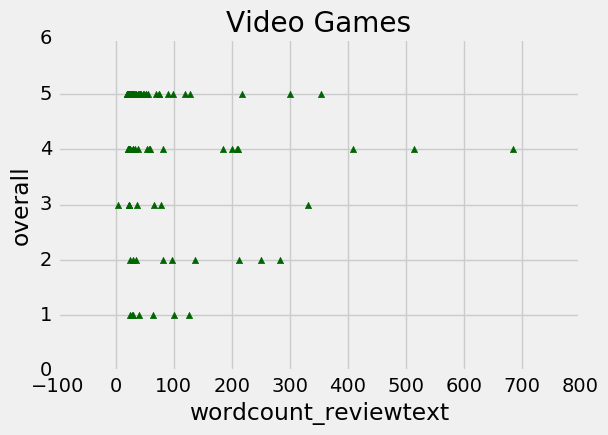

In [22]:
fig, ax = plt.subplots()
ax.scatter(Sample_AzReviews.head(100)['wordcount_reviewtext'], Sample_AzReviews.head(100)['overall'].dropna(), color = 'darkgreen', marker='^')
_ = plt.title('Video Games')
# Label the axes
_ = plt.xlabel('wordcount_reviewtext')
_ = plt.ylabel('overall')
plt.show()

###### Data Visualization: Scatter plot of wordcount of the reviewtext (segregated by different Product Types) versus overall ratings.  The common theme is that the lower word counts are prevalent for all overall ratings but as seen in the 'Baby' Product Type the higher wordcounts leads to either the lower Ratig of 1 or higher ratings of 4 or 5. 

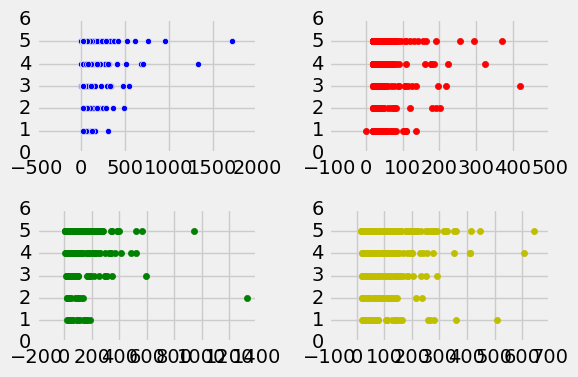

In [23]:
df1 = Sample_AzReviews.ix[Sample_AzReviews['ProductType'] == 'Instant Video'].head(500)
df2 = Sample_AzReviews.ix[Sample_AzReviews['ProductType'] == 'Android Apps'].head(500)
df3 = Sample_AzReviews.ix[Sample_AzReviews['ProductType'] == 'Automotive'].head(500)
df4 = Sample_AzReviews.ix[Sample_AzReviews['ProductType'] == 'Baby'].head(500)

fig = plt.figure()
# 'Instant Video'
ax1 = fig.add_subplot(221)
ax1.scatter(df1['wordcount_reviewtext'], df1['overall'])
ax1.set_title = 'Instant Video'
# 'Android Apps'
ax2 = fig.add_subplot(222)
ax2.scatter(df2['wordcount_reviewtext'], df2['overall'], color='r')
ax2.set_title  = 'Android Apps'
# 'Automotive'
ax3 = fig.add_subplot(223)
ax3.scatter(df3['wordcount_reviewtext'], df3['overall'], color='g')
ax3.title.set_text = 'Automotive'
# 'Baby'
ax4 = fig.add_subplot(224)
ax4.scatter(df4['wordcount_reviewtext'], df4['overall'], color='y')
ax4.title.set_text = 'Baby'

fig.tight_layout()

###### Data Visualization: Swarm plot of ReviewDate versus overall ratings.  There is a physcological reasoning that can be adopted of viewing the results that people seem to be more optimistic in the beginning and end of the month due to missing Ratings of 1 during that period.

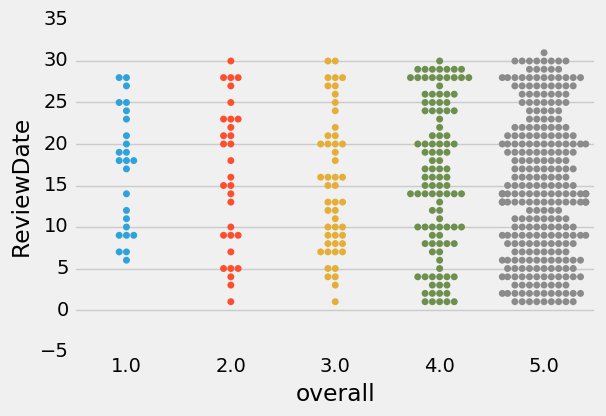

In [24]:
_ = sns.swarmplot(x='overall', y='ReviewDate', data=Sample_AzReviews.head(500))
_ = plt.xlabel('overall')
_ = plt.ylabel('ReviewDate')
plt.show()

###### Data Visualization:  In EDA the histogram or ECDF approximate the true CDF well if the sample size (the number of data) is large, and knowing the distribution is helpful for statistical inference. Our ECDF and histogram below shows us the distribution of the Overall Rating as we are treating this feature as a continuous variable. 

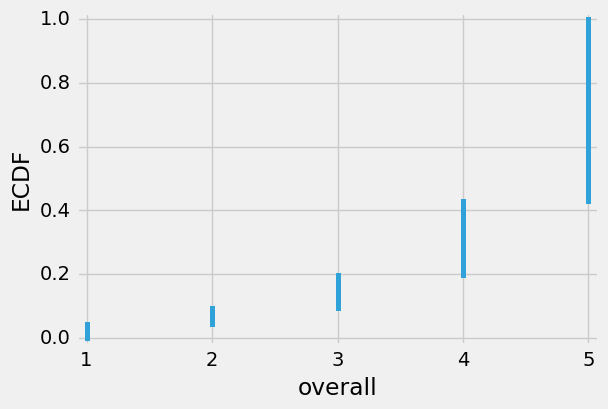

In [26]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x

    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

# Compute ECDF for overall score: x_overall, y_overall
x_overall, y_overall = ecdf(Sample_AzReviews['overall'])

# Generate plot
_ = plt.plot(x_overall, y_overall, marker='.', linestyle='none')

# Make the margins nice
plt.margins(0.02)

# Label the axes
_ = plt.xlabel('overall')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

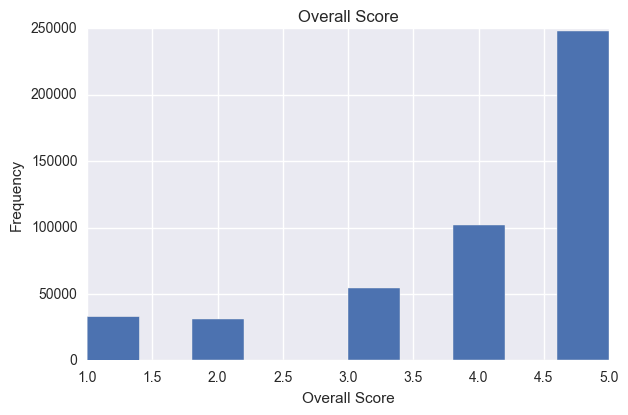

In [36]:
plt.hist(score_Reviews_data['overall'])
plt.title("Overall Score")
plt.xlabel("Overall Score")
plt.ylabel("Frequency")
plt.show()

###### Data Visualization: The score_Reviews_data is the dataframe that provides all numerical data that will be used for further statistical analysis and ML algorithms.  The heatmap below shows that with 2 observations [Rating=5, Wordcount=25, helpfulpercentage=100, Date=28] and [Rating=4, Wordcount=408, helpfulpercentage=66.67, Date=24] both further our earlier deductions that highest and lowest wordcounts have higher overall ratings and coincidentally also as provided towards the end of the month.

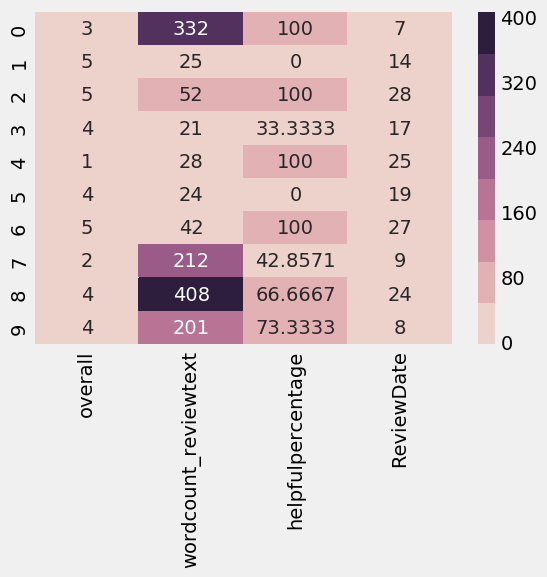

In [31]:
score_Reviews_data = Sample_AzReviews.dropna().loc[:,['overall','asin','ProductType','charcount_reviewtext','wordcount_reviewtext','helpful_numerator','helpful_denominator','helpfulpercentage','ReviewYear','ReviewMonth','ReviewDate','ReviewDayofWeek','ReviewWeekofYear']]
score_Reviews_data.reset_index(drop=True, inplace=True)
# score_Reviews_data.info()
'''
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467905 entries, 0 to 467904
Data columns (total 13 columns):
overall                 467905 non-null float64
asin                    467905 non-null object
ProductType             467905 non-null object
charcount_reviewtext    467905 non-null int64
wordcount_reviewtext    467905 non-null int64
helpful_numerator       467905 non-null int64
helpful_denominator     467905 non-null int64
helpfulpercentage       467905 non-null float64
ReviewYear              467905 non-null int64
ReviewMonth             467905 non-null int64
ReviewDate              467905 non-null int64
ReviewDayofWeek         467905 non-null int64
ReviewWeekofYear        467905 non-null object
dtypes: float64(2), int64(8), object(3)
memory usage: 46.4+ MB
'''
 
new_df = score_Reviews_data.dropna().drop(['asin','ProductType','helpful_numerator','helpful_denominator','charcount_reviewtext','ReviewMonth','ReviewYear','ReviewDayofWeek', 'ReviewWeekofYear'], axis=1)
ax = sns.heatmap(new_df.head(10),annot=True, fmt="g", cmap=sns.cubehelix_palette(8))

###### Data visualization: The Seaborn clustermap observations of [Wordcount=408,ReviewMonth=4,Overall=4,ReviewDayofWeek=2] , [21,4,4,2] and [25,11,5,3] additionally provide further evidence that the highest and lowest wordcounts for higher overall ratings of 4 or 5 is provided in the months of April or November and the first half of the week.  We can count on the months of April and November being optimistic months that bring in Spring and the Christmas shopping season respectively.

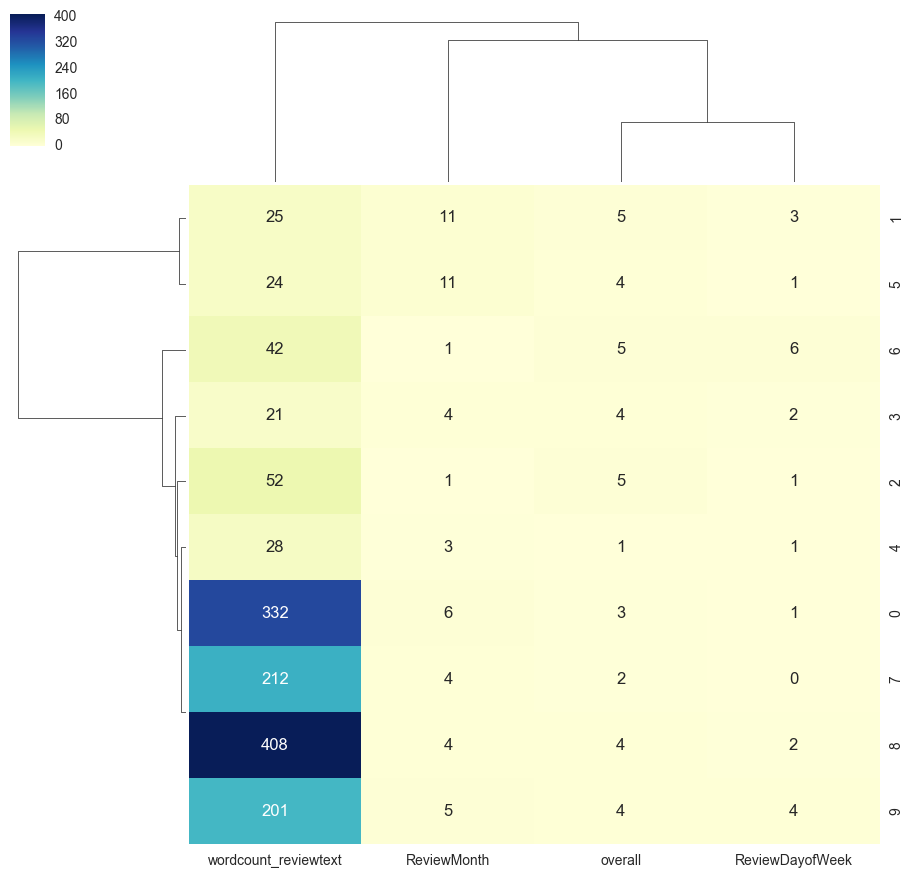

In [35]:
sns.set(color_codes=True)
newdf = score_Reviews_data.dropna().drop(['asin','ProductType','helpful_numerator', 'helpful_denominator','helpfulpercentage','charcount_reviewtext','ReviewDate','ReviewYear','ReviewWeekofYear'], axis=1)
g = sns.clustermap(newdf.head(10),metric="correlation",annot=True, fmt="g", cmap='YlGnBu')

###### Data visualization: The Seaborn pairplot below shows several observations:
1) Charcount highest numbers are for Overall=4.
2) Higher charcounts are in the earlier months of the year.
3) Higher charcounts are in the earlier half of the week.

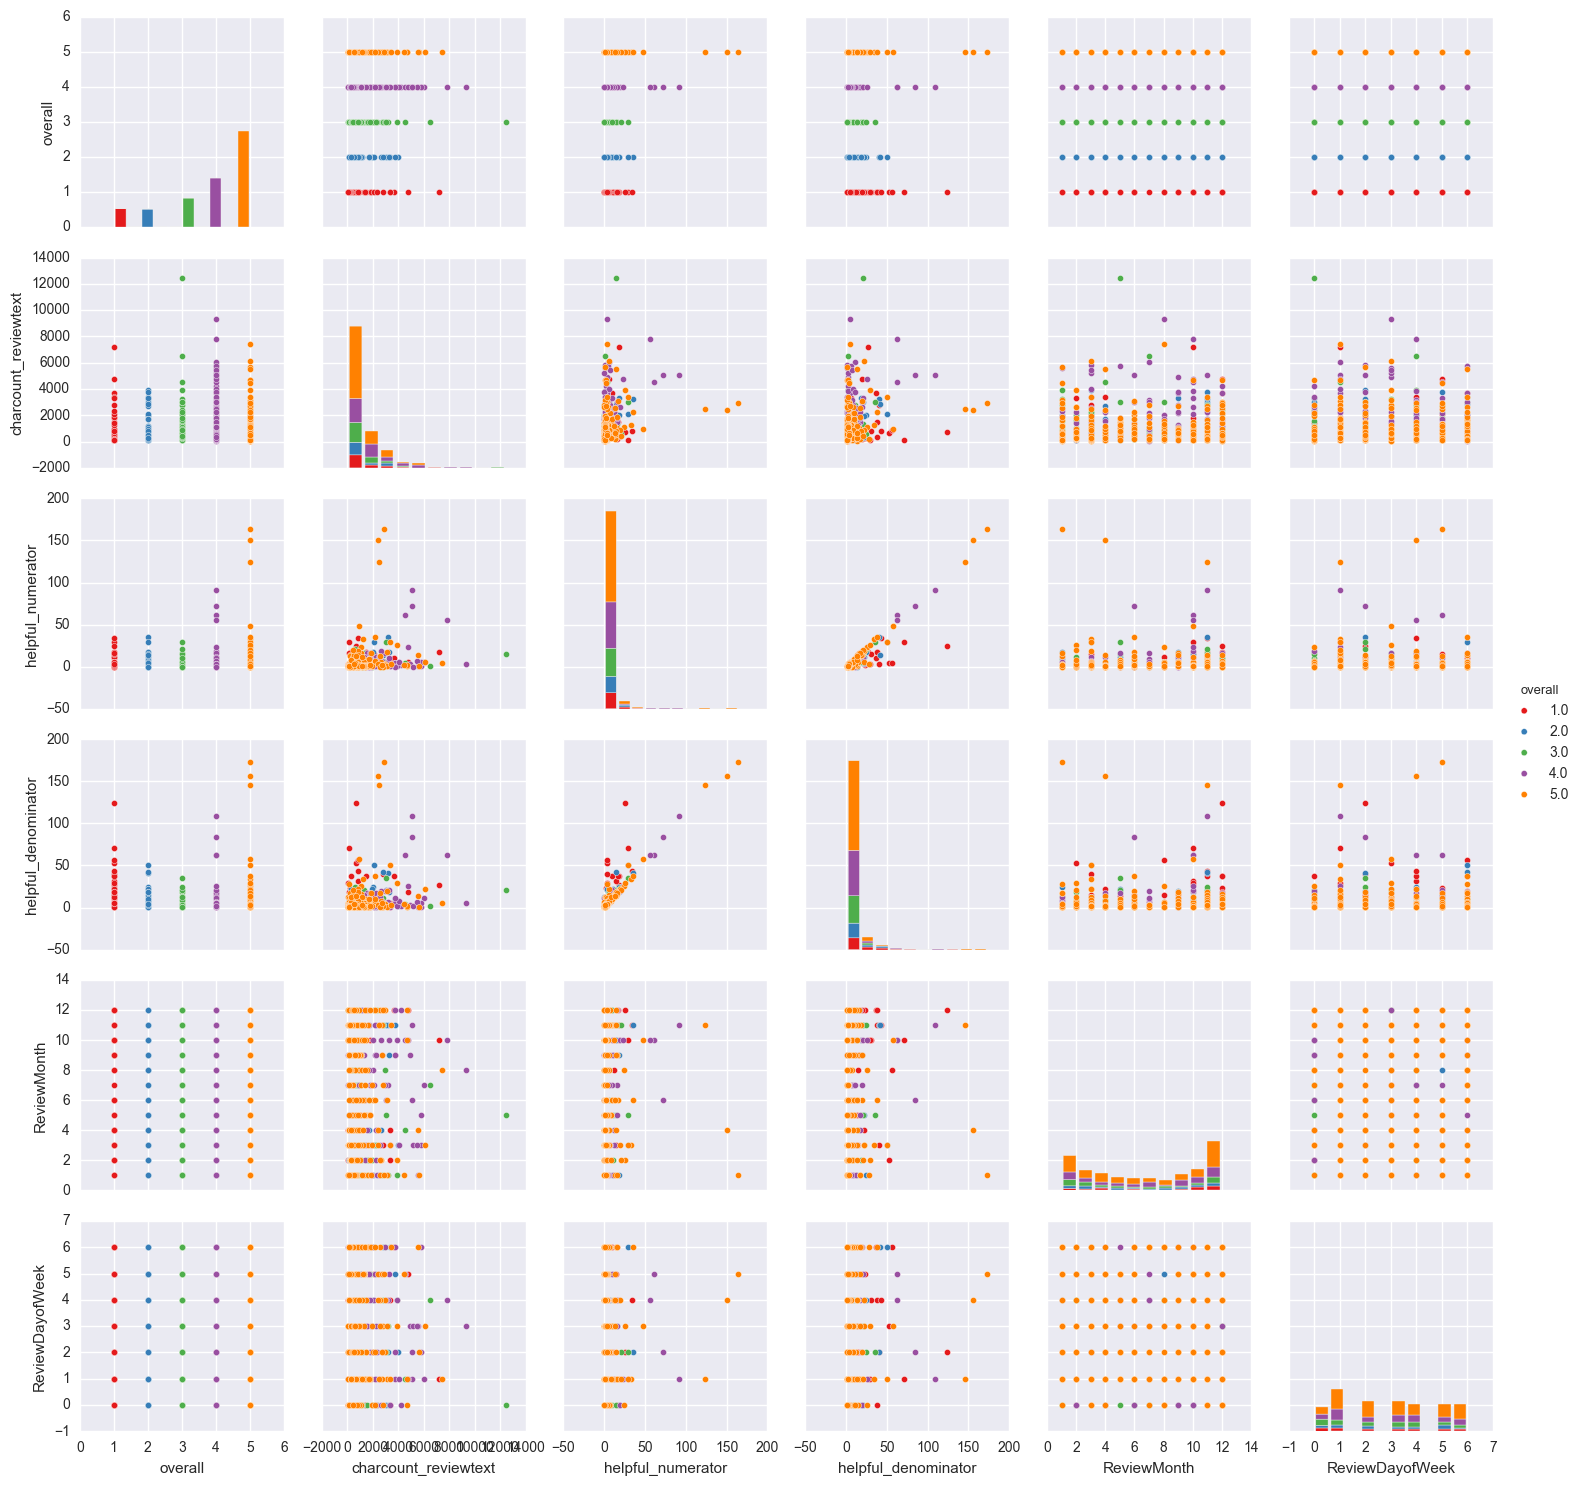

In [37]:
pairplotdf = score_Reviews_data.dropna().drop(['asin','ProductType','helpfulpercentage','wordcount_reviewtext','ReviewDate','ReviewYear','ReviewWeekofYear'], axis=1)
sns.pairplot(pairplotdf.tail(500),hue='overall',palette='Set1')

###### Data visualization:  Both boxplots below show that the means of the overall ratings against the product types are varied, this is the basis of the 1 way ANOVA inferential statistical study using statmodel where we will compare the grouped reviews based on producttype i.e. Instant Videos, Video Games, Android Apps, etc.

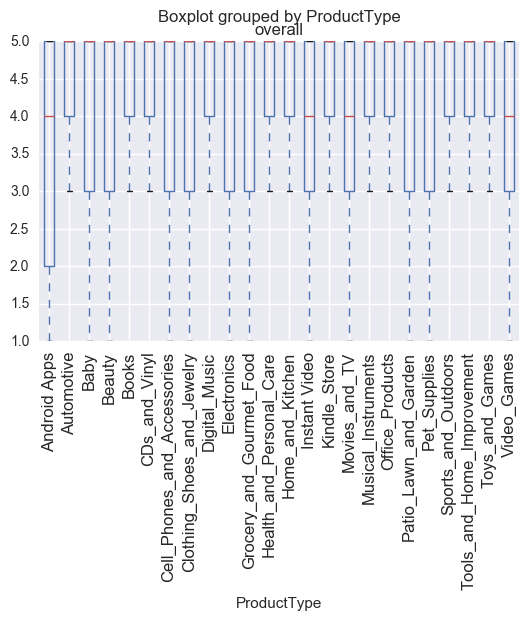

In [39]:
#Create a boxplot
score_Reviews_data.boxplot('overall', by='ProductType',rot=90)
# Show the plot
plt.show()

###### Data visualization: The NLP wordcloud proves that there are more positive reviews due to the words such as 'better', 'good','love','great' taking up a higher portion of the wordcloud real estate.

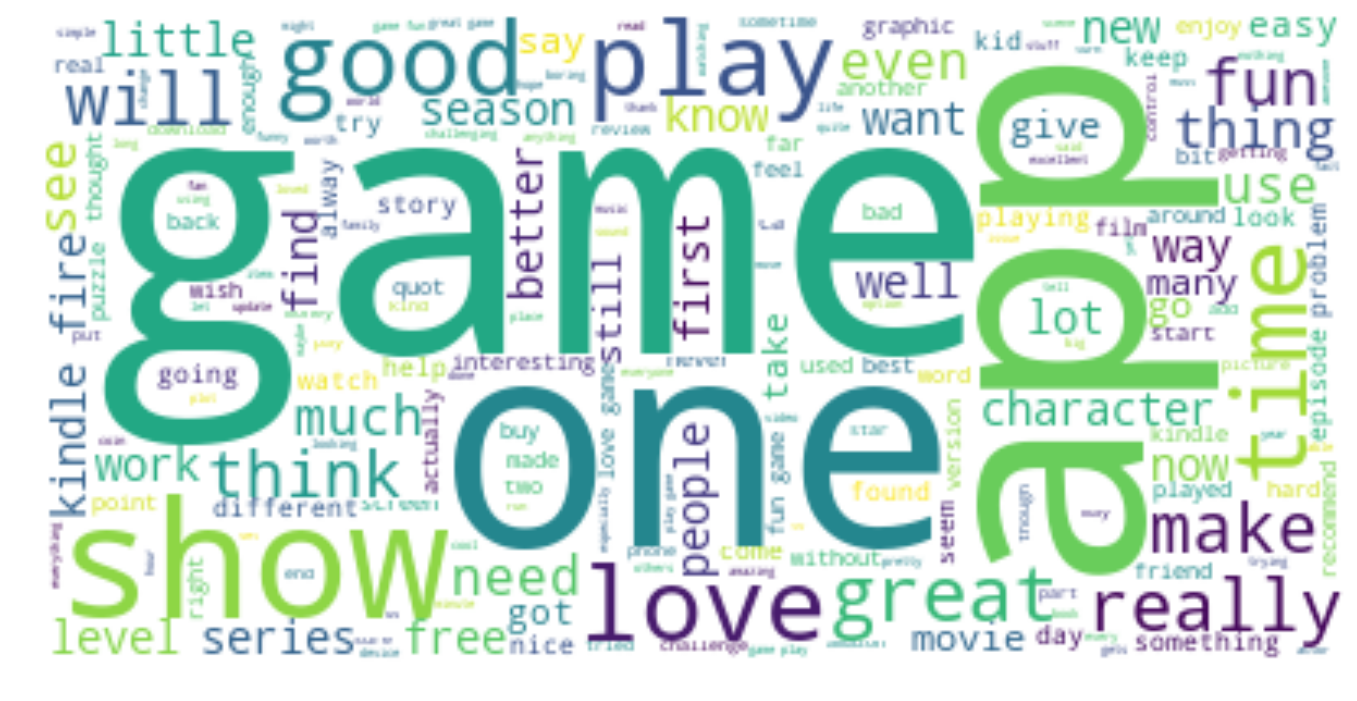

In [40]:
SampleallReviewText=Sample_AzReviews.loc[:,['reviewText']].head(10000)

allReviewText = ' '
for index, row in SampleallReviewText.iterrows():
    if pd.notnull(row['reviewText']):
        allReviewText = allReviewText + row['reviewText']

from wordcloud import WordCloud, STOPWORDS
import nltk

text = allReviewText
cleaned = nltk.word_tokenize(text.lower())
wordlist = [x for x in cleaned if (len(x)>=2 and x.isalpha())]
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white').generate(" ".join(wordlist))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# End of Data Visualization Section on Entire DataSet

# Start of Inferential Statistics Section 

###### Using 1 way ANOVA using statmodel where we will compare grouped reviews based on producttype i.e. Instant Videos, Video Games, Android Apps, etc. and based on wordcount groups.

In [42]:
reviewdata = score_Reviews_data

k = len(pd.unique(reviewdata.ProductType))  # number of conditions
N = len(reviewdata.overall.values)  # conditions times participants
n = reviewdata.groupby('ProductType').size()[0] #Participants in each condition

print("k=",k)
print("N=",N)
print("n=",n)

k= 24
N= 467905
n= 13950


In [51]:
grps = pd.unique(reviewdata.ProductType.values)
d_data = {grp:reviewdata['overall'][reviewdata.ProductType == grp] for grp in grps}
grps_wordcount = pd.unique(reviewdata.wordcount_reviewtext.values)
# print(grps_wordcount)
# [ 332   25   52 ..., 2806 2320 3105]

# print(np.min(grps_wordcount)) = 0
# print(np.max(grps_wordcount)) = 6113
# print(np.median(grps_wordcount)) = 1685.5

d_data_wordcount = {grp:reviewdata['overall'][reviewdata.wordcount_reviewtext == grp] for grp in grps_wordcount}

###### Inferential Statistics: (1) Hypothesis for the set of test data of overall Star Ratings against the Product Type of the reviewText:
###### H0: The average number of overall Star Ratings given for customer Reviews for each Product Type is equal.
###### Ha: The average number of overall Star Ratings given for customer Reviews for each Product Type is not equal.
###### After running the ANOVA test, the F-statistic is 526.0893902860769 and the p-value is near 0. Since the p-value is near zero we can reject the null hypothesis and conclude that the average number of overall Star Ratings given for customer Reviews for each product category is not equal.  This confirms the findings in the boxplot.

In [52]:
from scipy import stats

stats.f_oneway(d_data['Android Apps'], d_data['Automotive'], d_data['Baby'], d_data['Beauty'], d_data['Books'], d_data['CDs_and_Vinyl'])

F_onewayResult(statistic=526.0893902860769, pvalue=0.0)

###### Inferential Statistics: (2) Hypothesis for the other set of test data of overall Star Ratings against the wordcount of the reviewText:
###### H0: The average number of overall Star Ratings given for customer Reviews for each word_count category is equal.
###### Ha: The average number of overall Star Ratings given for customer Reviews for each word_count category is not equal.
###### After running the ANOVA test, the F-statistic is 0.07203281229366418 and the p-value is 0.9905100882043847. Since the p-value is not near zero we cannot reject the null hypothesis and conclude that the average number of overall Star Ratings given for customer Reviews for each word_count category is equal.

In [68]:
stats.f_oneway(d_data_wordcount[0],d_data_wordcount[476], d_data_wordcount[999],d_data_wordcount[3048], d_data_wordcount[ 4848])

F_onewayResult(statistic=0.07203281229366418, pvalue=0.9905100882043847)

###### Inferential Statistics: The test result suggests the groups don't have the same sample means in this case, since the p-value is significant at a 99% confidence level. To check which groups differ after getting a positive ANOVA result, you can perform a follow up test or "post-hoc test". One post-hoc test is to perform a separate t-test for each pair of groups. You can perform a t-test between all pairs by running each pair through the stats.ttest_ind().  The results below show since the p-values are not below 0.05 we cannot reject the null hypothesis and conclude that the pairs’ mean values are equal.

In [73]:
# Get all wordcount pairs
wordcounts =[0,476,999,3048, 4848]
wordcount_pairs = []

for wordcount1 in range(4):
    for wordcount2  in range(wordcount1+1,5):
        wordcount_pairs.append((wordcounts[wordcount1], wordcounts[wordcount2]))

# Conduct t-test on each pair
for wordcount1, wordcount2 in wordcount_pairs: 
    print(wordcount1, wordcount2)
    print(stats.ttest_ind(d_data_wordcount[wordcount1], 
                          d_data_wordcount[wordcount2])) 

0 476
Ttest_indResult(statistic=0.5243915355846621, pvalue=0.6004708786574138)
0 999
Ttest_indResult(statistic=0.18242476143756678, pvalue=0.8555851722209963)
0 3048
Ttest_indResult(statistic=0.1211632110752595, pvalue=0.9038203892635411)
0 4848
Ttest_indResult(statistic=nan, pvalue=nan)
476 999
Ttest_indResult(statistic=-0.08187480888206944, pvalue=0.9348403714648184)
476 3048
Ttest_indResult(statistic=0.03744783452639184, pvalue=0.9701752052910082)
476 4848
Ttest_indResult(statistic=nan, pvalue=nan)
999 3048
Ttest_indResult(statistic=0.06909801595573156, pvalue=0.9456734379918976)
999 4848
Ttest_indResult(statistic=nan, pvalue=nan)
3048 4848
Ttest_indResult(statistic=nan, pvalue=nan)


C:\Program Files\Anaconda33\lib\site-packages\numpy\core\fromnumeric.py:3194: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)


######  Inferential Statistics: This test compares all possible pairs and we can use it to precisely identify pairs where the difference between two means is greater than the expected standard error. 
###### For each pair of mean values:
###### H0: The means are equal.
###### Ha: The means are not equal.
###### The result below shows each pairs’ mean difference.  Since the pair’s mean values are not statistically significantly different, then we cannot reject the null hypothesis and conclude that the pairs’ mean values are equal. In the table below, the ‘reject’ column has a False value.

In [ ]:
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)

tukey = pairwise_tukeyhsd(endog=reviewdata['overall'],     # Data
                          groups=reviewdata['wordcount_reviewtext'],   # Groups
                          alpha=0.05)          # Significance level
# for wordcount1, wordcount2 in wordcount_pairs: 
#     print(wordcount1, wordcount2)
#     mod = MultiComparison(d_data_wordcount[wordcount1], 
#                           d_data_wordcount[wordcount2])
# #     print(mod.tukeyhsd()[0])
# tukey = pairwise_tukeyhsd(d_data_wordcount[0],d_data_wordcount[476], d_data_wordcount[1685],d_data_wordcount[3048], d_data_wordcount[4848])          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

tukey.summary()

# End of Inferential Statistics Section 

# Start of Machine Learning

###### Machine Learning:   Models used -
1. KNN (k-Nearest Neighbors) Classifier
2. Linear Regression
3. KNN Regression
4. Random Forest Regression

###### RESULTS
1. KNN Classifier: The accuracy score of overall ratings against wordcount or product type does not differ much.
2. Linear Regression: The accurac

###### Machine Learning: Start of Data Classification Section - KNN Clustering Model  Using 2 test datasets - 1) Overall vs Wordcount 2) Overall vs Product Type

###### Machine Learning: Prepocessing the data

In [78]:
score_Reviews_data_ML = Sample_AzReviewswithdummies
score_Reviews_data_ML = score_Reviews_data_ML.dropna().drop(['asin','unixReviewTime', 'reviewerID', 'helpful', 'reviewerName','reviewTime', 'summary','reviewText','ProductType'], axis=1)
score_Reviews_data_ML.reset_index(drop=True, inplace=True)

###### Machine Learning:  KNN Classifier - Overall vs Wordcount 

In [79]:
df_wc = score_Reviews_data_ML.loc[:,['overall','wordcount_reviewtext']]

# Create arrays for the features and the response variable
y = df_wc['overall'].values
X = df_wc.drop('overall',axis=1).values

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
# Split into training and test set
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

#Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

###### Machine Learning: KNN Classifier  - Overall vs Wordcount 
###### Prediction - Supervised Estimators - Predict Labels 

In [106]:
# Predict the labels for the training data X
y_pred = knn.predict(X_train)
print("Trained data Prediction: {}".format(y_pred))

# Predict and print the label for the new data point X_new
new_prediction = knn.predict(X_test)
print("Prediction: {}".format(new_prediction))

Trained data Prediction: [ 5.  5.  5. ...,  5.  5.  5.]
Prediction: [ 5.  5.  5. ...,  5.  5.  5.]


###### Machine Learning: Checking Accuracy of the model and choosing the best hyperparameter(k in KNN)
###### Both plots show that the best k = 19 should be good to use for the machine learning KNN classifier model.

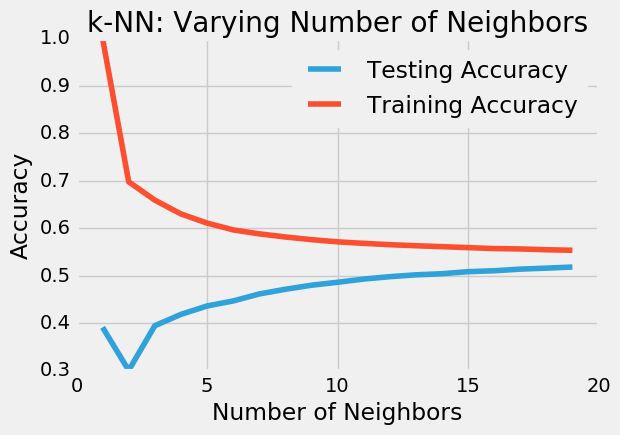

In [93]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

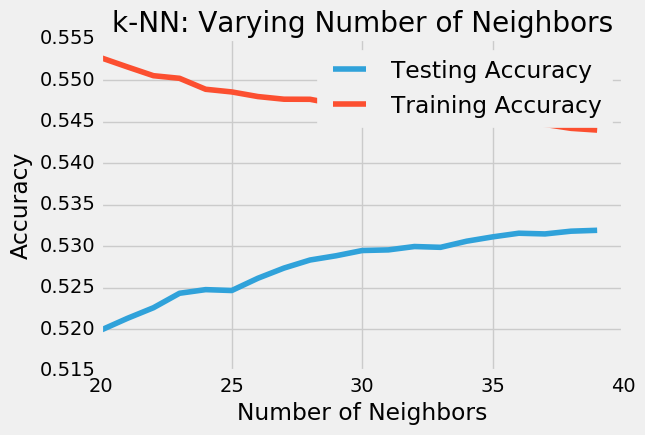

In [94]:
## Setup arrays to store train and test accuracies
neighbors = np.arange(20, 40)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

###### Machine Learning:  KNN Classifier - Overall vs Product Type 

In [80]:
df_prodtype = score_Reviews_data_ML.loc[:,['overall','ProductType_Android Apps', 'ProductType_Automotive',
       'ProductType_Baby', 'ProductType_Beauty', 'ProductType_Books',
       'ProductType_CDs_and_Vinyl', 'ProductType_Cell_Phones_and_Accessories',
       'ProductType_Clothing_Shoes_and_Jewelry', 'ProductType_Digital_Music',
       'ProductType_Electronics', 'ProductType_Grocery_and_Gourmet_Food',
       'ProductType_Health_and_Personal_Care', 'ProductType_Home_and_Kitchen',
       'ProductType_Instant Video', 'ProductType_Kindle_Store',
       'ProductType_Movies_and_TV', 'ProductType_Musical_Instruments',
       'ProductType_Office_Products', 'ProductType_Patio_Lawn_and_Garden',
       'ProductType_Pet_Supplies', 'ProductType_Sports_and_Outdoors',
       'ProductType_Tools_and_Home_Improvement', 'ProductType_Toys_and_Games',
       'ProductType_Video_Games']]

# Create arrays for the features and the response variable
y = df_prodtype['overall'].values
X = df_prodtype.drop('overall',axis=1).values

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split

# Split into training and test set
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

In [110]:
# Create a k-NN classifier with 6 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=19)

# Fit the classifier to the data
knn.fit(X_train,y_train)

# Predict the labels for the training data X
y_pred = knn.predict(X_train)
print("Trained data Prediction: {}".format(y_pred))

# Predict and print the label for the new data point X_new
new_prediction = knn.predict(X_test)
print("Prediction: {}".format(new_prediction))

Trained data Prediction: [ 5.  5.  5. ...,  5.  4.  5.]
Prediction: [ 5.  5.  5. ...,  5.  5.  5.]


###### Machine Learning: End of Data Classification Section - KNN Clustering Model

###### Machine Learning: Start of Applying Linear Regression Model Section

In [129]:
# Create arrays for the features and the response variable
y = df_wc['overall'].values
X = df_wc.drop('overall',axis=1).values

# Split into training and test set
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True)

lr.fit(X,y)

In [147]:
y_pred = lr.predict(X_test)
y_pred

array([ 4.07166076,  4.05513045,  4.07711775, ...,  4.07632111,
        4.04907597,  4.07691859])

In [149]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.98446158394958794

In [148]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

1.5377914648810029

In [150]:
from sklearn.metrics import r2_score
# r2_score(y_true, y_pred)
r2_score(y_test, y_pred)

1.6727732158328124e-06

###### Machine Learning: End of Applying Linear Regression Model Section 

###### Machine Learning: Start of Evaluation of Model Section

In [89]:
# Load libraries
import pandas
# from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

###### Machine Learning: Create a Validation Set

In [106]:
#Changing object type to int for the reamining features
score_Reviews_data_ML['overall'] = score_Reviews_data_ML['overall'].astype(int)
score_Reviews_data_ML['helpfulpercentage'] = score_Reviews_data_ML['helpfulpercentage'].astype(int)
score_Reviews_data_ML['ReviewWeekofYear'] = score_Reviews_data_ML['ReviewWeekofYear'].astype(int)

###### Machine Learning: Select Best Model - KNN Regressor or Random Forest Regressor

In [107]:
array = df_wc.values
X = array[:,1:]
Y = array[:,0]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

# Test options and evaluation metric
seed = 7
scoring = 'neg_mean_squared_error'

# Spot Check Algorithms
models = []
models.append(('KNN', KNeighborsRegressor()))
models.append(('RF', RandomForestRegressor()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    cv_results_rmse = np.sqrt(-cv_results)
   
    msg = "%s: %f (%f)" % (name, cv_results_rmse.mean(), cv_results_rmse.std())
    print(msg)
    print("Scores:",cv_results_rmse)

KNN: 1.355362 (0.013045)
Scores: [1.37012169 1.36568186 1.34785677 1.34802404 1.35154207 1.33528087
 1.33769594 1.37758403 1.36094033 1.35888785]
RF: 1.241716 (0.005410)
Scores: [1.23577651 1.24724618 1.24439871 1.24167359 1.24458206 1.24525065
 1.24243527 1.24836241 1.23733685 1.23009348]


In [94]:
array = df_prodtype.head(500).values
X = array[:,1:]
Y = array[:,0]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

# Spot Check Algorithms
models = []
models.append(('KNN', KNeighborsRegressor()))
models.append(('RF', RandomForestRegressor()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    cv_results_rmse = np.sqrt(-cv_results)
   
    msg = "%s: %f (%f)" % (name, cv_results_rmse.mean(), cv_results_rmse.std())
    print(msg)
    print("Scores:",cv_results_rmse)

In [96]:
df_prodtype.groupby('overall').count()

,ProductType_Android Apps,ProductType_Automotive,ProductType_Baby,ProductType_Beauty,ProductType_Books,ProductType_CDs_and_Vinyl,ProductType_Cell_Phones_and_Accessories,ProductType_Clothing_Shoes_and_Jewelry,ProductType_Digital_Music,ProductType_Electronics,...,ProductType_Kindle_Store,ProductType_Movies_and_TV,ProductType_Musical_Instruments,ProductType_Office_Products,ProductType_Patio_Lawn_and_Garden,ProductType_Pet_Supplies,ProductType_Sports_and_Outdoors,ProductType_Tools_and_Home_Improvement,ProductType_Toys_and_Games,ProductType_Video_Games
overall,,,,,,,,,,,,,,,,,,,,,
1.0,32889,32889,32889,32889,32889,32889,32889,32889,32889,32889,...,32889,32889,32889,32889,32889,32889,32889,32889,32889,32889
2.0,30855,30855,30855,30855,30855,30855,30855,30855,30855,30855,...,30855,30855,30855,30855,30855,30855,30855,30855,30855,30855
3.0,54405,54405,54405,54405,54405,54405,54405,54405,54405,54405,...,54405,54405,54405,54405,54405,54405,54405,54405,54405,54405
4.0,101681,101681,101681,101681,101681,101681,101681,101681,101681,101681,...,101681,101681,101681,101681,101681,101681,101681,101681,101681,101681
5.0,248075,248075,248075,248075,248075,248075,248075,248075,248075,248075,...,248075,248075,248075,248075,248075,248075,248075,248075,248075,248075


In [97]:
df_wc.groupby('overall').count()

,wordcount_reviewtext
overall,
1.0,32889
2.0,30855
3.0,54405
4.0,101681
5.0,248075


###### Machine Learning: Removing Sample Bias

Sample_df_wc = pd.DataFrame()
Sample_df_wc_condition1 = df_wc['overall'] == 1.0
Sample_df_wc_condition2 = df_wc['overall'] == 2.0
Sample_df_wc_condition3 = df_wc['overall'] == 3.0
Sample_df_wc_condition4 = df_wc['overall'] == 4.0
Sample_df_wc_condition5 = df_wc['overall'] == 5.0

Sample_df_wc = df_wc[Sample_df_wc_condition1].head(500)
Sample_df_wc = Sample_df_wc.append(df_wc[Sample_df_wc_condition2].head(500))
Sample_df_wc = Sample_df_wc.append(df_wc[Sample_df_wc_condition3].head(500))
Sample_df_wc = Sample_df_wc.append(df_wc[Sample_df_wc_condition4].head(500))
Sample_df_wc = Sample_df_wc.append(df_wc[Sample_df_wc_condition5].head(500))

In [100]:
array = Sample_df_wc.values
X = array[:,1:]
Y = array[:,0]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

# Spot Check Algorithms
models = []
models.append(('KNN', KNeighborsRegressor()))
models.append(('RF', RandomForestRegressor()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    cv_results_rmse = np.sqrt(-cv_results)
   
    msg = "%s: %f (%f)" % (name, cv_results_rmse.mean(), cv_results_rmse.std())
    print(msg)
    print("Scores:",cv_results_rmse)

KNN: 1.527712 (0.049753)
Scores: [1.5158496  1.45409766 1.56300992 1.53316666 1.55858911 1.53616405
 1.43352712 1.54757875 1.52039469 1.61474456]
RF: 1.472718 (0.049531)
Scores: [1.40382186 1.46873455 1.49842505 1.47637999 1.52601056 1.44732699
 1.37839153 1.52559957 1.46740417 1.53508312]


###### ###### Machine Learning: Removing Sample Bias

In [102]:
Sample_df_prodtype = pd.DataFrame()

Sample_df_prodtype_condition1 = df_prodtype['overall'] == 1.0
Sample_df_prodtype_condition2 = df_prodtype['overall'] == 2.0
Sample_df_prodtype_condition3 = df_prodtype['overall'] == 3.0
Sample_df_prodtype_condition4 = df_prodtype['overall'] == 4.0
Sample_df_prodtype_condition5 = df_prodtype['overall'] == 5.0

Sample_df_prodtype = df_prodtype[Sample_df_prodtype_condition1].sample(n=10000, random_state=99)
Sample_df_prodtype = Sample_df_prodtype.append(df_prodtype[Sample_df_prodtype_condition2].sample(n=10000, random_state=99))
Sample_df_prodtype = Sample_df_prodtype.append(df_prodtype[Sample_df_prodtype_condition3].sample(n=10000, random_state=99))
Sample_df_prodtype = Sample_df_prodtype.append(df_prodtype[Sample_df_prodtype_condition4].sample(n=10000, random_state=99))
Sample_df_prodtype = Sample_df_prodtype.append(df_prodtype[Sample_df_prodtype_condition5].sample(n=10000, random_state=99))

In [104]:
array = Sample_df_prodtype.values
X = array[:,1:]
Y = array[:,0]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

# Spot Check Algorithms
models = []
models.append(('KNN', KNeighborsRegressor()))
models.append(('RF', RandomForestRegressor()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    cv_results_rmse = np.sqrt(-cv_results)
   
    msg = "%s: %f (%f)" % (name, cv_results_rmse.mean(), cv_results_rmse.std())
    print(msg)
    print("Scores:",cv_results_rmse)

KNN: 1.475989 (0.041456)
Scores: [1.59495454 1.47552025 1.43858959 1.47887119 1.47126816 1.4669049
 1.45382255 1.47310556 1.45217768 1.45467866]
RF: 1.404220 (0.009076)
Scores: [1.40463518 1.4037015  1.39032269 1.39145576 1.42032089 1.40528109
 1.40192191 1.41613185 1.40967979 1.39874934]


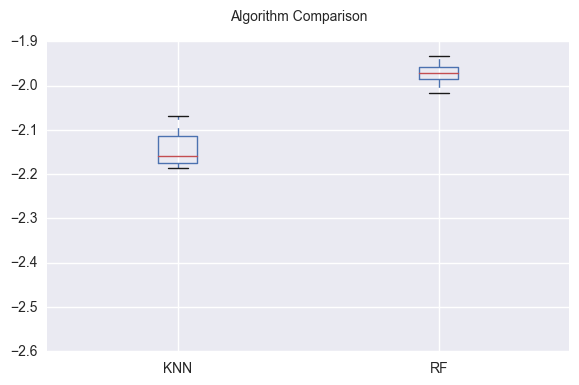

In [105]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

###### Machine Learning: Since Random Forest is the clear winner we investigate it further

In [76]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
array = score_Reviews_data_ML.sample(n=5000, random_state=99).values

features_df = score_Reviews_data_ML.drop('overall', axis = 1)
# Saving feature names for later use
feature_list = list(features_df.columns)

features = array[:,1:]
labels = array[:,0]
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [77]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (3750, 34)
Training Labels Shape: (3750,)
Testing Features Shape: (1250, 34)
Testing Labels Shape: (1250,)


In [55]:
score_Reviews_data_ML
# The baseline predictions are the historical averages
# baseline_preds = test_features[:, feature_list.index('wordcount_reviewtext')]
# Baseline errors, and display average baseline error
# baseline_errors = abs(baseline_preds - test_labels)
baseline_errors = abs(4.071153 - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  0.99


In [56]:
baseline_errors

array([0.9288470000000002, 0.9288470000000002, 0.9288470000000002, ...,
       1.0711529999999998, 0.9288470000000002, 0.9288470000000002],
      dtype=object)

In [60]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'rating points.')

Mean Absolute Error: 0.93 rating points.


In [61]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 62.47 %.


In [65]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: helpfulpercentage    Importance: 0.17
Variable: charcount_reviewtext Importance: 0.12
Variable: helpful_denominator  Importance: 0.12
Variable: wordcount_reviewtext Importance: 0.1
Variable: ReviewDate           Importance: 0.1
Variable: ReviewWeekofYear     Importance: 0.09
Variable: ReviewYear           Importance: 0.08
Variable: ReviewDayofWeek      Importance: 0.06
Variable: helpful_numerator    Importance: 0.03
Variable: ReviewMonth          Importance: 0.03
Variable: ProductType_Android Apps Importance: 0.01
Variable: ProductType_Books    Importance: 0.01
Variable: ProductType_CDs_and_Vinyl Importance: 0.01
Variable: ProductType_Electronics Importance: 0.01
Variable: ProductType_Home_and_Kitchen Importance: 0.01
Variable: ProductType_Movies_and_TV Importance: 0.01
Variable: ProductType_Video_Games Importance: 0.01
Variable: ProductType_Automotive Importance: 0.0
Variable: ProductType_Baby     Importance: 0.0
Variable: ProductType_Beauty   Importance: 0.0
Variable: Produ

###### Machine Learning: The accuracy does not seem to improve by just taking the 2 most important features

In [68]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)
# Extract the two most important features
important_indices = [feature_list.index('helpfulpercentage'), feature_list.index('charcount_reviewtext')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]
# Train the random forest
rf_most_important.fit(train_important, train_labels)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'rating points.')
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.99 rating points.
Accuracy: 59.13 %.


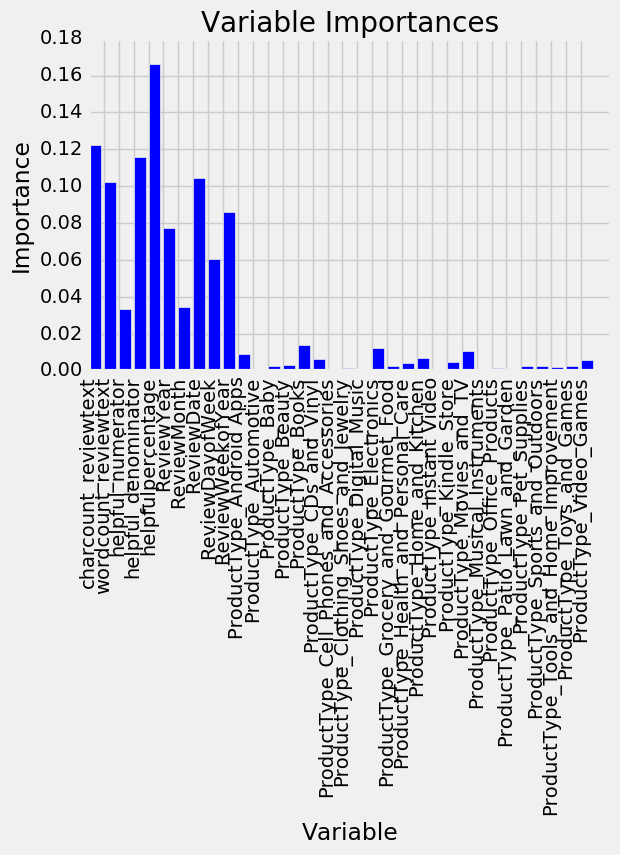

In [69]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

###### Machine Learning: The graph below shows that actual and predicted values follow closely with each other and there are no clear outliers making the model more credible.

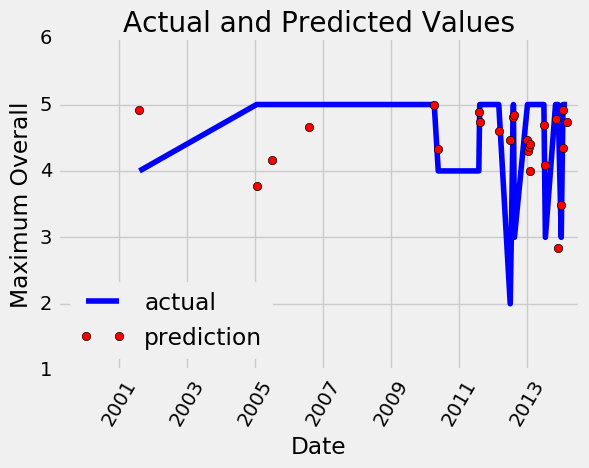

In [203]:
# Use datetime for creating date objects for plotting
import datetime

# Dates of test data and predictions
months = test_features[:, feature_list.index('ReviewMonth')]
days = test_features[:, feature_list.index('ReviewDate')]
years = test_features[:, feature_list.index('ReviewYear')]

# Column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]

# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]

# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': test_dates, 'actual': test_labels})

# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})



new_actual_df = true_data.head(25)
sorted_new_actual_df = new_actual_df.sort_values(by=['date'])

new_predicted_df = predictions_data.head(25)
sorted_new_predicted_df = new_predicted_df.sort_values(by=['date'])

plt.xlim(predictions_data['date'].min(),predictions_data['date'].max())
plt.ylim(1.0,6.0)

plt.plot(sorted_new_actual_df['date'], sorted_new_actual_df['actual'],'b-')
plt.plot(sorted_new_predicted_df['date'], sorted_new_predicted_df['prediction'], 'ro')

plt.xticks(rotation = '60'); 
plt.legend(loc=3)

# Graph labels
plt.xlabel('Date'); plt.ylabel('Maximum Overall'); 
plt.title('Actual and Predicted Values');


###### QUESTIONS ASKED & ANSWERED

<div class="span5 alert alert-info">

   <p>Q1.	Does the wordcount in the review text matter? Do more words mean higher overall Star Ratings?</p>

   <p>A1.	Yes,the wordcount in the review text matters as shown by the importance plot. More words mean higher overall Star Ratings since we have seen pairplots give us those indications.</p>

   <p>Q2.	Do all Overall Star Ratings (1-5) have the same behavior across Product Categories i.e. Do Amazon Customers give more 1 stars to Baby products or more 5 stars to Android Apps?</p>

   <p>A2.	On an average the overall rating given for each Product Category differs as seen by the boxplot as well as the Inferential statistics and the 1-way ANOVA test.</p>
   
   <p>Q3.	Can we predict Overall Star Ratings given the word count of the review text?</p>
   
   <p>A3.	The Overall Star Ratings can be predicted using the wordcount of the review text since actual and predicted values follow very closely as seen in the plot using the Random Forest Regressor Model.</p>
</div>

# End of Machine Learning